## Observations and Insights 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import iqr
import numpy as np
from scipy.stats import linregress


from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
num_mice = len(mouse_metadata)
print(num_mice)
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df

249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice in the DataFrame.
len(merge_df['Mouse ID'].unique())

249

In [4]:
len(merge_df['Mouse ID'].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
merge_df.loc[merge_df["Mouse ID"] != "g989" ]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df["Mouse ID"] == "g989" ]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[merge_df["Mouse ID"] != "g989" ]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [10]:
reg_groupby =  clean_df.groupby(["Drug Regimen"])
r_mean = reg_groupby["Tumor Volume (mm3)"].mean()
r_median = reg_groupby["Tumor Volume (mm3)"].median()
r_var = reg_groupby["Tumor Volume (mm3)"].var()
r_std = reg_groupby["Tumor Volume (mm3)"].std()
r_sem = reg_groupby["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame(
{"mean" : r_mean,
"median" : r_median,
 "var": r_var,
 "std" : r_std,
 "sem" : r_sem,
})
summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
mouse_metadata.count()
study_results.count()
merge_df.count()
len(merge_df['Mouse ID'].unique())

249

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
summary_df2 = clean_df.groupby('Drug Regimen').agg({ 
    'Tumor Volume (mm3)':['size','mean','median','var','std','sem']
})
summary_df2

Tumor Volume (mm3)                                             \
                           size       mean     median        var       std   
Drug Regimen                                                                 
Capomulin                   230  40.675741  41.557809  24.947764  4.994774   
Ceftamin                    178  52.591172  51.776157  39.290177  6.268188   
Infubinol                   178  52.884795  51.820584  43.128684  6.567243   
Ketapril                    188  55.235638  53.698743  68.553577  8.279709   
Naftisol                    186  54.331565  52.509285  66.173479  8.134708   
Placebo                     181  54.033581  52.288934  61.168083  7.821003   
Propriva                    148  52.320930  50.446266  43.852013  6.622085   
Ramicane                    228  40.216745  40.673236  23.486704  4.846308   
Stelasyn                    181  54.233149  52.431737  59.450562  7.710419   
Zoniferol                   182  53.236507  51.818479  48.533355  6.966589   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

OBSERVATION: The mice on Ramicane and Capomulin have the smallest average tumor volume. 

## Bar Plots

Text(0, 0.5, 'Count')

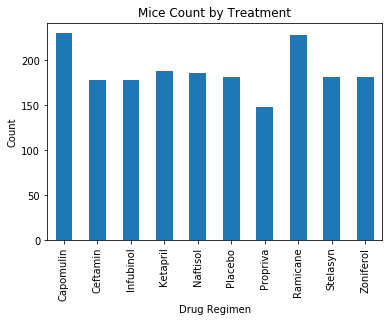

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
a = summary_df2['Tumor Volume (mm3)']['size'].plot(kind = 'bar',title="Mice Count by Treatment")
a.set_ylabel("Count")



In [14]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


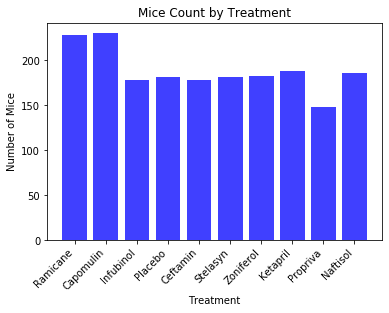

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#Get list of med names
med_names = clean_df['Drug Regimen'].unique()
#dir(med_names)
med_names
#Get List of how many mice have taken each meds using count or value counts

num_mice = []
len(med_names)
for row in med_names:
    meds = clean_df.loc[clean_df["Drug Regimen"] == row]
    num_mice.append(len(meds))


plt.bar(med_names, num_mice, facecolor="Blue", alpha=0.75, align="center")
#plt.xticks(ind, countries)
plt.ylabel("Number of Mice")
plt.xlabel("Treatment")
plt.title("Mice Count by Treatment")
plt.ylim=1.0
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Pie Plots

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,123,123,123,123
Male,125,125,125,125


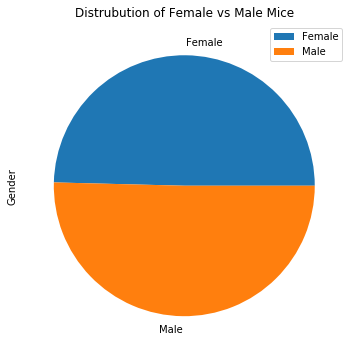

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_mouse = mouse_metadata.loc[mouse_metadata["Mouse ID"] != "g989" ]
mouse_gender = clean_mouse.groupby("Sex").count()

plot = mouse_gender.plot.pie(y = 'Mouse ID',figsize=(6, 6), title = "Distrubution of Female vs Male Mice")
plot.set_ylabel("Gender")
mouse_gender

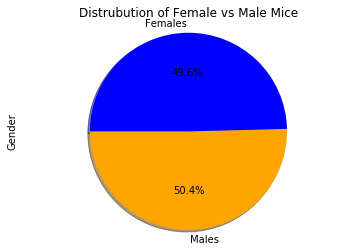

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,123,123,123,123
Male,125,125,125,125


In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# DATA SET 3
gen = ["Males", "Females"]
members = [mouse_gender["Mouse ID"]['Male'], mouse_gender["Mouse ID"]['Female']]
colors = ["orange", "blue"]
plt.title("Distrubution of Female vs Male Mice")
plt.pie(members, labels=gen, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.ylabel("Gender")
plt.axis("equal")
plt.show()
mouse_gender

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

#drug = mice.get_group(mouse_id)['Drug Regimen'].iloc[-1] #This is how i get the drug regimen for the last volumn
#last_tumor_vol = mice.get_group(mouse_id).iloc[-1][6] #This is how i get the last volumn in the mouse idmice)
#last_weight = mice.get_group(mouse_id).iloc[-1][4] #this is how i get the last weight
# mice.get_group(mouse_id)['Tumor Volume (mm3)'].mean() #this is how i get the average tumor volumn

mice = clean_df.groupby(['Mouse ID'])

#I want to find the final tumor values for each mouse on each drug
mouse_ids = list(mice['Mouse ID'].groups.keys()) #This is how I get all the id. I will use this to make this into a function

tumor_vol = []
for num, mouse in enumerate(mouse_ids, start=1):
    drug = mice.get_group(mouse)['Drug Regimen'].iloc[-1] #This is how i get the drug regimen for the last volum
    if drug == 'Capomulin' or drug == 'Ramicane' or drug == 'Infubinol' or drug == 'Ceftamin':
            tumor_vol.append(mice.get_group(mouse).iloc[-1][6]) #This is how i get the last volumn in the mouse idmice)

            
stats_df = pd.DataFrame({
 "tumor_vol" : tumor_vol,  #had to put data in to a dataframe in order to use the quartiles function in Pandas
})

In [45]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = stats_df.tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the final tumor volume is: {lowerq}")
print(f"The upper quartile of the final tumor volume is: {upperq}")
print(f"The interquartile range of the final tumor volume is: {iqr}")
print(f"The the median of the final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the final tumor volume is: 37.187743802499995
The upper quartile of the final tumor volume is: 59.930261755000004
The interquartile range of the final tumor volume is: 22.74251795250001
The the median of the final tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


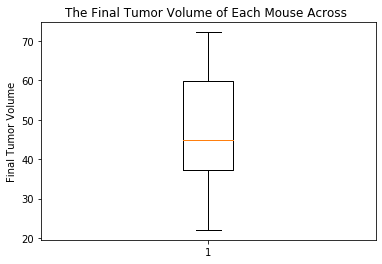

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Generate a box plot
plt.boxplot(tumor_vol)
plt.title('The Final Tumor Volume of Each Mouse Across the four treatments')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [ ]:
OBSERVATION: The mice on Ramicane and Capoulin have average tumor volumns of about 40.5 mm3 versus the median tumor volumn of 40 mm3

## Line and Scatter Plots

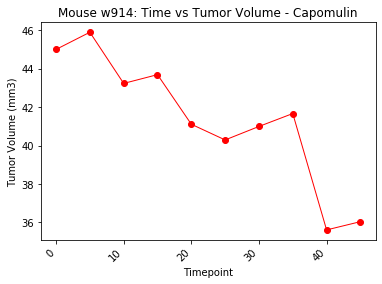

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
one_mouse = clean_df.loc[clean_df['Mouse ID'] == 'w914']
timepoint = []
vol = []

for col, row in one_mouse.iterrows():
    timepoint.append(row['Timepoint'])
    vol.append(row['Tumor Volume (mm3)'])

plt.plot(timepoint, vol, marker="o", color="red", linewidth=1)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title(f"Mouse w914: Time vs Tumor Volume - Capomulin")
plt.ylim=1.0
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


OBSERVATION: The average tumor volume decreases with Capomulin over time. 

In [39]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin','Stelasyn']

def makeScatter(drug):
    cap_mice = clean_df.loc[clean_df['Drug Regimen'] == drug]
    #cap_mice = cap_mice[['Mouse ID','Weight (g)', 'Tumor Volume (mm3)','Timepoint']]
    #mice_data = cap_mice.groupby("Mouse ID")
    #mice_data.groups
    scatter_data = cap_mice[['Weight (g)','Tumor Volume (mm3)']]

    x = cap_mice['Weight (g)']
    y = cap_mice['Tumor Volume (mm3)']


    plt.scatter(x,y)
    plt.ylabel("Tumor Volume (mm3)")
    plt.xlabel("Weight (g)")
    plt.title(f"All Mice: Weight vs Tumor Volume - {drug}")
    plt.ylim=1.0
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

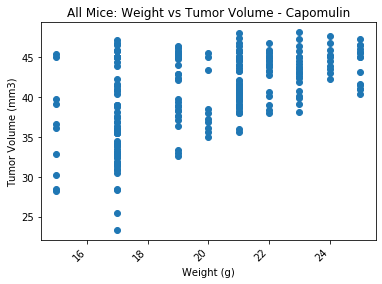

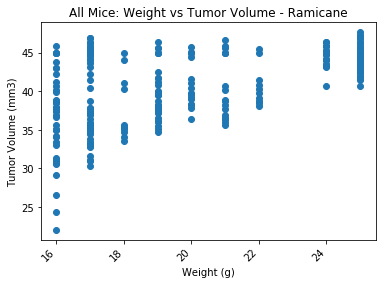

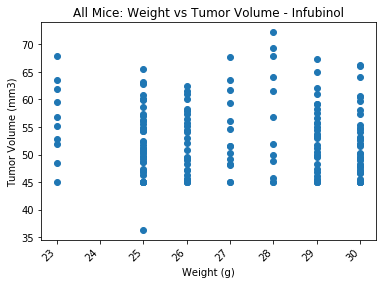

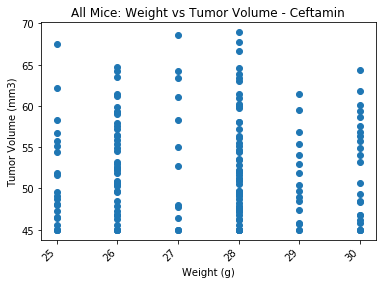

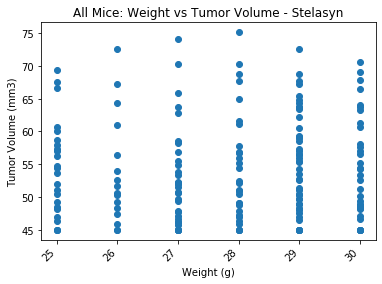

In [40]:

for drug in drugs:
    makeScatter(drug)

In [ ]:
OBSERVATION; The Ramicane has the least amout of variablity in terms of tumor volume.

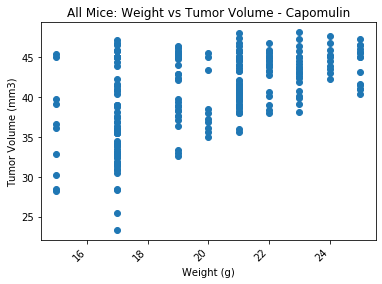

In [41]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_mice = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
#cap_mice = cap_mice[['Mouse ID','Weight (g)', 'Tumor Volume (mm3)','Timepoint']]
#mice_data = cap_mice.groupby("Mouse ID")
#mice_data.groups
scatter_data = cap_mice[['Weight (g)','Tumor Volume (mm3)']]

x = cap_mice['Weight (g)']
y = cap_mice['Tumor Volume (mm3)']


plt.scatter(x,y)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title(f"All Mice: Weight vs Tumor Volume - Capomulin")
plt.ylim=1.0
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Correlation and Regression

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)


The correlation between both factors is 0.53


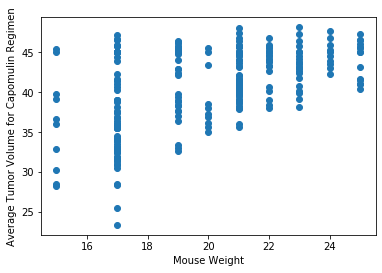

In [44]:
plt.scatter(x,y)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume for Capomulin Regimen')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

OBSERVATION: Basesed on a correlation coefficient of 0.53, we can say there is a moderate correlation between Average Tumor Volume and Weight for mice on Capomulin.

The r-squared is: 0.2763600223455911


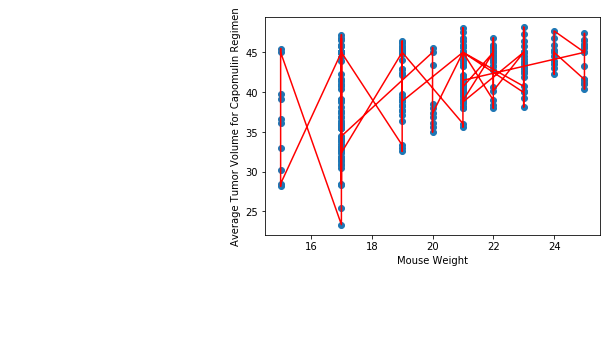

In [50]:
#x_values = housing_data['RM']
#y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,y,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume for Capomulin Regimen')
print(f"The r-squared is: {rvalue**2}")
plt.show()